In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 윈저사이저 적용
df = pd.read_csv('../분류모델 + 성능평가/label지정.csv', encoding='CP949')
df.drop(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', 'month'],axis=1,inplace=True)
for col in df.columns:
     df[col] = winsorize(df[col], limits= 0.01)

In [3]:
# Data set1 라쏘로 선정된 피처들 분리
df = df.sort_values(["year"],ascending=True)
df_data = df[['[제조]총자본증가율','[제조]매입채무회전기간',"[제조]매출액순이익률",
              '[제조]매출채권회전기간','[제조]부채비율','[제조]자기자본순이익률','[제조]자본분배율']]
# df_data_scaled= StandardScaler().fit_transform(df_data)
# df_data_scaled= MinMaxScaler().fit_transform(df_data)
# df_data_scaled = pd.DataFrame(df_data_scaled)
# df_data_scaled.columns =[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율',
# '[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
# df[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율',
# '[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']] = df_data_scaled[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
df =df.reset_index(drop="index")
df.describe()

,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,[제조]총자본증가율,[제조]자기자본증가율,[제조]유동자산증가율,[제조]순이익증가율,[제조]재고자산증가율,[제조]매출액총이익률,[제조]매출액순이익률,...,[제조]설비투자효율,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,label
count,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,...,10662.000000,1.066200e+04,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000
mean,10.040534,23.361944,16.704286,12.220262,15.836482,14.723224,25.650324,18.858264,22.463340,-10.183054,...,221.716125,2.677133e+04,18.035400,74.612863,13.690038,-21.099724,10.324715,119.613665,2015.869818,0.015757
std,42.182144,99.770390,51.054379,33.196715,52.173915,47.879051,176.733747,88.655826,18.500643,53.231124,...,720.931744,2.023488e+05,40.843982,103.639510,100.123553,156.026445,24.863801,635.198913,2.882518,0.124539
min,-67.340000,-77.660000,-58.530000,-47.320000,-76.570000,-62.460000,-712.840000,-85.890000,-20.170000,-377.340000,...,-1512.180000,-1.210066e+04,-255.080000,0.000000,-710.100000,-1161.000000,0.290000,-245.990000,2011.000000,0.000000
25%,-9.657500,-5.257500,-4.167500,-3.217500,-1.920000,-8.830000,-31.597500,-11.220000,9.960000,-5.770000,...,30.782500,7.957000e+01,12.020000,38.280000,2.385000,-0.297500,1.660000,-0.687500,2013.000000,0.000000
50%,4.300000,1.440000,4.485000,5.520000,5.870000,5.535000,0.000000,0.000000,18.760000,2.330000,...,65.950000,2.685100e+02,21.785000,57.065000,35.020000,10.985000,3.030000,2.470000,2016.000000,0.000000
75%,19.100000,17.970000,21.067500,17.827500,17.110000,23.542500,38.895000,22.117500,32.007500,7.927500,...,136.275000,1.303918e+03,34.447500,76.037500,52.097500,28.827500,6.407500,17.077500,2018.000000,0.000000
max,244.000000,760.870000,333.070000,187.780000,333.240000,261.040000,848.100000,644.970000,78.550000,41.160000,...,4902.680000,1.921618e+06,85.720000,810.100000,85.040000,72.920000,175.190000,5431.730000,2020.000000,1.000000


In [6]:
# train test set 분리
df1 = df[df['year']<2019] #train
df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
X_train= df1[['[제조]총자본증가율','[제조]매입채무회전기간',"[제조]매출액순이익률",
              '[제조]매출채권회전기간','[제조]부채비율','[제조]자기자본순이익률','[제조]자본분배율']]
X_test = df2[['[제조]총자본증가율','[제조]매입채무회전기간',"[제조]매출액순이익률",
              '[제조]매출채권회전기간','[제조]부채비율','[제조]자기자본순이익률','[제조]자본분배율']]
y_train = df1["label"]
y_test = df2["label"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)
X_test.describe()

,[제조]총자본증가율,[제조]매입채무회전기간,[제조]매출액순이익률,[제조]매출채권회전기간,[제조]부채비율,[제조]자기자본순이익률,[제조]자본분배율
count,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000
mean,13.330016,29.133529,-18.047857,66.159891,93.595695,-6.138442,9.528263
std,34.928019,26.062509,71.236929,47.987155,112.038792,31.632761,103.091747
min,-47.320000,0.000000,-377.340000,3.030000,4.210000,-163.900000,-710.100000
25%,-3.090000,11.675000,-9.990000,35.240000,27.525000,-10.490000,0.000000
50%,5.720000,23.170000,1.830000,56.160000,59.770000,2.320000,31.250000
75%,18.880000,38.725000,8.605000,83.130000,115.750000,9.570000,50.870000
max,187.780000,147.470000,41.160000,284.840000,739.190000,42.780000,85.040000


In [7]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [5]:
from sklearn.model_selection import GridSearchCV


In [8]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [9]:
tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(X_train, y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 2, 'min_samples_leaf': 19}, 최적 평균 정확도 :0.983


In [54]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#최적 하이퍼 파라미터 :{'max_depth': 2, 'min_samples_leaf': 19}, 최적 평균 정확도 :0.983
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 2,min_samples_leaf=19)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [55]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [56]:
# # 하이퍼파라미터 Grid-Search
# from sklearn.model_selection import GridSearchCV

# # 탐색 범위 정의
# grid_search = {'criterion': ['entropy', 'gini'],
#                'max_depth': [2,4,6,8],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [4,6,8.10],
#                'min_samples_split': [4,6,8,10],
#                'n_estimators': [20,40,60,80,100]}

# model = RandomForestClassifier()
# grid = GridSearchCV(estimator = model, param_grid = grid_search, 
#                                cv = 4,verbose=0, n_jobs = -1)
# grid.fit(X_train,y_train)

# # 최선의 결과 출력
# print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


In [57]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 최적 하이퍼 파라미터 :{'criterion': 'entropy', 
# 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 80}
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'auto',
                                     max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [58]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


In [59]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(X_train,y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\tlsdm\AppData\Local\Programs\Pyt

In [60]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.01, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

In [61]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [62]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(knn_X_train, y_train)
    knn_pred = knn_clf.predict(knn_X_test)
    knn_score=accuracy_score(y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.975457732761979
2
0.9859758472925594
3
0.9848071679002727
4
0.9867549668874173
5
0.9855862874951306
6
0.987534086482275
7
0.987923646279704
8
0.987534086482275
9
0.987534086482275
10
0.987923646279704


In [63]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=7)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [64]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[['[제조]총자본증가율','[제조]매입채무회전기간',"[제조]매출액순이익률",
              '[제조]매출채권회전기간','[제조]부채비율','[제조]자기자본순이익률','[제조]자본분배율']]
X_train_XG.columns = [['총자본증가율','매입채무회전기간',"매출액순이익률",
              '매출채권회전기간','부채비율','자기자본순이익률','자본분배율']]
X_test_XG = df2[['[제조]총자본증가율','[제조]매입채무회전기간',"[제조]매출액순이익률",
              '[제조]매출채권회전기간','[제조]부채비율','[제조]자기자본순이익률','[제조]자본분배율']]
X_test_XG.columns =[['총자본증가율','매입채무회전기간',"매출액순이익률",
              '매출채권회전기간','부채비율','자기자본순이익률','자본분배율']]
y_train_XG = df1["label"]
y_test_XG = df2["label"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)




[17:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [65]:
# #xgb 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {
#           'n_estimators':[20,40,60,80,100],
#           'learning_rate':[0.03,0.05,0.07,0.09],
#           'max_depth' : [4,6,8,10]
#           }

# grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train_XG,y_train_XG)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [66]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100}, 최적 평균 정확도:0.982
xgb_wrapper = XGBClassifier(learning_rate= 0.03, max_depth= 4, n_estimators= 100)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

In [67]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)






In [68]:
# from sklearn.metrics import accuracy_score

# pc_scores = []
# for i in range(1,11):
#     pc_clf = Perceptron(n_iter=i)
#     pc_clf.fit(X_train, y_train)
#     pc_pred = pc_clf.predict(X_test)
    
#     pc_scores=accuracy_score(y_test, pc_pred)
#     print(i)
#     print(pc_scores)

In [69]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 6)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [70]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[2412  125]
 [  21    9]]
정확도: 0.9431, 정밀도 : 0.0672, 재현율:0.3000,F1 스코어:0.1098
ROC 스코어: 0.6254, PR score : 0.0283
None
디시전트리
오차행렬
[[2485   52]
 [  24    6]]
정확도: 0.9704, 정밀도 : 0.1034, 재현율:0.2000,F1 스코어:0.1364
ROC 스코어: 0.5898, PR score : 0.0300
None
디시전트리 최적의 모델
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
None
랜덤포레스트
오차행렬
[[2532    5]
 [  26    4]]
정확도: 0.9879, 정밀도 : 0.4444, 재현율:0.1333,F1 스코어:0.2051
ROC 스코어: 0.5657, PR score : 0.0694
None
랜덤포레스트 최적의 모델
오차행렬
[[2537    0]
 [  28    2]]
정확도: 0.9891, 정밀도 : 1.0000, 재현율:0.0667,F1 스코어:0.1250
ROC 스코어: 0.5333, PR score : 0.0776
None
로지스틱
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
None
로지스틱회귀 최적의 모델
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
None
Knn
오차행렬
[[2536    1]
 [  30    0]]
정확도: 0.9879, 정밀도 : 0.0000, 재현율:0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.1  재현율은 0.1
get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2357  180]
 [  15   15]]
정확도: 0.9240, 정밀도 : 0.0769, 재현율:0.5000,F1 스코어:0.1333
ROC 스코어: 0.7145, PR score : 0.0443
임곗값: 0.2
오차행렬
[[2373  164]
 [  18   12]]
정확도: 0.9291, 정밀도 : 0.0682, 재현율:0.4000,F1 스코어:0.1165
ROC 스코어: 0.6677, PR score : 0.0343
임곗값: 0.3
오차행렬
[[2391  146]
 [  21    9]]
정확도: 0.9349, 정밀도 : 0.0581, 재현율:0.3000,F1 스코어:0.0973
ROC 스코어: 0.6212, PR score : 0.0256
임곗값: 0.4
오차행렬
[[2406  131]
 [  21    9]]
정확도: 0.9408, 정밀도 : 0.0643, 재현율:0.3000,F1 스코어:0.1059
ROC 스코어: 0.6242, PR score : 0.0275
임곗값: 0.5
오차행렬
[[2412  125]
 [  21    9]]
정확도: 0.9431, 정밀도 : 0.0672, 재현율:0.3000,F1 스코어:0.1098
ROC 스코어: 0.6254, PR score : 0.0283
임곗값: 0.6
오차행렬
[[2418  119]
 [  21    9]]
정확도: 0.9455, 정밀도 : 0.0703, 재현율:0.3000,F1 스코어:0.1139
ROC 스코어: 0.6265, PR score : 0.0293
임곗값: 0.7
오차행렬
[[2425  112]
 [  21    9]]
정확도: 0.9482, 정밀도 : 0.0744, 재현율:0.3000,F1 스코어:0.1192
ROC 스코어: 0.6279, PR score : 0.0305
임곗값: 0.8
오차행렬
[[2440   97]
 [  23    7]]
정확도: 0.9533, 정밀도 : 0.0673, 재현율:0.2333,F1 스코어:0.1045
ROC 스코어: 0.

In [72]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2485   52]
 [  24    6]]
정확도: 0.9704, 정밀도 : 0.1034, 재현율:0.2000,F1 스코어:0.1364
ROC 스코어: 0.5898, PR score : 0.0300
임곗값: 0.2
오차행렬
[[2485   52]
 [  24    6]]
정확도: 0.9704, 정밀도 : 0.1034, 재현율:0.2000,F1 스코어:0.1364
ROC 스코어: 0.5898, PR score : 0.0300
임곗값: 0.3
오차행렬
[[2485   52]
 [  24    6]]
정확도: 0.9704, 정밀도 : 0.1034, 재현율:0.2000,F1 스코어:0.1364
ROC 스코어: 0.5898, PR score : 0.0300
임곗값: 0.4
오차행렬
[[2485   52]
 [  24    6]]
정확도: 0.9704, 정밀도 : 0.1034, 재현율:0.2000,F1 스코어:0.1364
ROC 스코어: 0.5898, PR score : 0.0300
임곗값: 0.5
오차행렬
[[2485   52]
 [  24    6]]
정확도: 0.9704, 정밀도 : 0.1034, 재현율:0.2000,F1 스코어:0.1364
ROC 스코어: 0.5898, PR score : 0.0300
임곗값: 0.6
오차행렬
[[2485   52]
 [  24    6]]
정확도: 0.9704, 정밀도 : 0.1034, 재현율:0.2000,F1 스코어:0.1364
ROC 스코어: 0.5898, PR score : 0.0300
임곗값: 0.7
오차행렬
[[2485   52]
 [  24    6]]
정확도: 0.9704, 정밀도 : 0.1034, 재현율:0.2000,F1 스코어:0.1364
ROC 스코어: 0.5898, PR score : 0.0300
임곗값: 0.8
오차행렬
[[2485   52]
 [  24    6]]
정확도: 0.9704, 정밀도 : 0.1034, 재현율:0.2000,F1 스코어:0.1364
ROC 스코어: 0.

In [73]:
# 디시전트리 최적
# 임계값 0.2 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2447   90]
 [  18   12]]
정확도: 0.9579, 정밀도 : 0.1176, 재현율:0.4000,F1 스코어:0.1818
ROC 스코어: 0.6823, PR score : 0.0541
임곗값: 0.2
오차행렬
[[2483   54]
 [  18   12]]
정확도: 0.9720, 정밀도 : 0.1818, 재현율:0.4000,F1 스코어:0.2500
ROC 스코어: 0.6894, PR score : 0.0797
임곗값: 0.3
오차행렬
[[2515   22]
 [  25    5]]
정확도: 0.9817, 정밀도 : 0.1852, 재현율:0.1667,F1 스코어:0.1754
ROC 스코어: 0.5790, PR score : 0.0406
임곗값: 0.4
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.5
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.6
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.7
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local

In [74]:
#로지스틱 회귀
#0.2 때 F1 스코어가 제일 좋음
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2455   82]
 [  20   10]]
정확도: 0.9603, 정밀도 : 0.1087, 재현율:0.3333,F1 스코어:0.1639
ROC 스코어: 0.6505, PR score : 0.0440
임곗값: 0.2
오차행렬
[[2499   38]
 [  23    7]]
정확도: 0.9762, 정밀도 : 0.1556, 재현율:0.2333,F1 스코어:0.1867
ROC 스코어: 0.6092, PR score : 0.0453
임곗값: 0.3
오차행렬
[[2515   22]
 [  25    5]]
정확도: 0.9817, 정밀도 : 0.1852, 재현율:0.1667,F1 스코어:0.1754
ROC 스코어: 0.5790, PR score : 0.0406
임곗값: 0.4
오차행렬
[[2521   16]
 [  28    2]]
정확도: 0.9829, 정밀도 : 0.1111, 재현율:0.0667,F1 스코어:0.0833
ROC 스코어: 0.5302, PR score : 0.0183
임곗값: 0.5
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
임곗값: 0.6
오차행렬
[[2534    3]
 [  29    1]]
정확도: 0.9875, 정밀도 : 0.2500, 재현율:0.0333,F1 스코어:0.0588
ROC 스코어: 0.5161, PR score : 0.0196
임곗값: 0.7
오차행렬
[[2535    2]
 [  29    1]]
정확도: 0.9879, 정밀도 : 0.3333, 재현율:0.0333,F1 스코어:0.0606
ROC 스코어: 0.5163, PR score : 0.0224
임곗값: 0.8
오차행렬
[[2537    0]
 [  29    1]]
정확도: 0.9887, 정밀도 : 1.0000, 재현율:0.0333,F1 스코어:0.0645
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# 로지 회귀 최적 파라미터
# 임계값 0.2일때 F1 스코어 최대
get_eval_by_threshold(y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2455   82]
 [  20   10]]
정확도: 0.9603, 정밀도 : 0.1087, 재현율:0.3333,F1 스코어:0.1639
ROC 스코어: 0.6505, PR score : 0.0440
임곗값: 0.2
오차행렬
[[2499   38]
 [  23    7]]
정확도: 0.9762, 정밀도 : 0.1556, 재현율:0.2333,F1 스코어:0.1867
ROC 스코어: 0.6092, PR score : 0.0453
임곗값: 0.3
오차행렬
[[2515   22]
 [  25    5]]
정확도: 0.9817, 정밀도 : 0.1852, 재현율:0.1667,F1 스코어:0.1754
ROC 스코어: 0.5790, PR score : 0.0406
임곗값: 0.4
오차행렬
[[2521   16]
 [  28    2]]
정확도: 0.9829, 정밀도 : 0.1111, 재현율:0.0667,F1 스코어:0.0833
ROC 스코어: 0.5302, PR score : 0.0183
임곗값: 0.5
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
임곗값: 0.6
오차행렬
[[2534    3]
 [  29    1]]
정확도: 0.9875, 정밀도 : 0.2500, 재현율:0.0333,F1 스코어:0.0588
ROC 스코어: 0.5161, PR score : 0.0196
임곗값: 0.7
오차행렬
[[2535    2]
 [  29    1]]
정확도: 0.9879, 정밀도 : 0.3333, 재현율:0.0333,F1 스코어:0.0606
ROC 스코어: 0.5163, PR score : 0.0224
임곗값: 0.8
오차행렬
[[2537    0]
 [  29    1]]
정확도: 0.9887, 정밀도 : 1.0000, 재현율:0.0333,F1 스코어:0.0645
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
#랜덤 포레스트
# 임계값 0.3일 때 F1스코어 최대
get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2428  109]
 [  14   16]]
정확도: 0.9521, 정밀도 : 0.1280, 재현율:0.5333,F1 스코어:0.2065
ROC 스코어: 0.7452, PR score : 0.0737
임곗값: 0.2
오차행렬
[[2491   46]
 [  21    9]]
정확도: 0.9739, 정밀도 : 0.1636, 재현율:0.3000,F1 스코어:0.2118
ROC 스코어: 0.6409, PR score : 0.0573
임곗값: 0.3
오차행렬
[[2518   19]
 [  23    7]]
정확도: 0.9836, 정밀도 : 0.2692, 재현율:0.2333,F1 스코어:0.2500
ROC 스코어: 0.6129, PR score : 0.0718
임곗값: 0.4
오차행렬
[[2526   11]
 [  25    5]]
정확도: 0.9860, 정밀도 : 0.3125, 재현율:0.1667,F1 스코어:0.2174
ROC 스코어: 0.5812, PR score : 0.0618
임곗값: 0.5
오차행렬
[[2532    5]
 [  26    4]]
정확도: 0.9879, 정밀도 : 0.4444, 재현율:0.1333,F1 스코어:0.2051
ROC 스코어: 0.5657, PR score : 0.0694
임곗값: 0.6
오차행렬
[[2536    1]
 [  29    1]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.0333,F1 스코어:0.0625
ROC 스코어: 0.5165, PR score : 0.0280
임곗값: 0.7
오차행렬
[[2536    1]
 [  29    1]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.0333,F1 스코어:0.0625
ROC 스코어: 0.5165, PR score : 0.0280
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.3일 때 최대
get_eval_by_threshold(y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2439   98]
 [  17   13]]
정확도: 0.9552, 정밀도 : 0.1171, 재현율:0.4333,F1 스코어:0.1844
ROC 스코어: 0.6974, PR score : 0.0574
임곗값: 0.2
오차행렬
[[2509   28]
 [  22    8]]
정확도: 0.9805, 정밀도 : 0.2222, 재현율:0.2667,F1 스코어:0.2424
ROC 스코어: 0.6278, PR score : 0.0678
임곗값: 0.3
오차행렬
[[2528    9]
 [  24    6]]
정확도: 0.9871, 정밀도 : 0.4000, 재현율:0.2000,F1 스코어:0.2667
ROC 스코어: 0.5982, PR score : 0.0893
임곗값: 0.4
오차행렬
[[2532    5]
 [  27    3]]
정확도: 0.9875, 정밀도 : 0.3750, 재현율:0.1000,F1 스코어:0.1579
ROC 스코어: 0.5490, PR score : 0.0480
임곗값: 0.5
오차행렬
[[2537    0]
 [  28    2]]
정확도: 0.9891, 정밀도 : 1.0000, 재현율:0.0667,F1 스코어:0.1250
ROC 스코어: 0.5333, PR score : 0.0776
임곗값: 0.6
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.7
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local

In [78]:
#knn 
#임계값 0.6일때 최대
get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1096 1441]
 [   2   28]]
정확도: 0.4379, 정밀도 : 0.0191, 재현율:0.9333,F1 스코어:0.0374
ROC 스코어: 0.6827, PR score : 0.0186
임곗값: 0.2
오차행렬
[[1500 1037]
 [  10   20]]
정확도: 0.5921, 정밀도 : 0.0189, 재현율:0.6667,F1 스코어:0.0368
ROC 스코어: 0.6290, PR score : 0.0165
임곗값: 0.3
오차행렬
[[1500 1037]
 [  10   20]]
정확도: 0.5921, 정밀도 : 0.0189, 재현율:0.6667,F1 스코어:0.0368
ROC 스코어: 0.6290, PR score : 0.0165
임곗값: 0.4
오차행렬
[[1980  557]
 [  17   13]]
정확도: 0.7764, 정밀도 : 0.0228, 재현율:0.4333,F1 스코어:0.0433
ROC 스코어: 0.6069, PR score : 0.0165
임곗값: 0.5
오차행렬
[[1980  557]
 [  17   13]]
정확도: 0.7764, 정밀도 : 0.0228, 재현율:0.4333,F1 스코어:0.0433
ROC 스코어: 0.6069, PR score : 0.0165
임곗값: 0.6
오차행렬
[[2500   37]
 [  28    2]]
정확도: 0.9747, 정밀도 : 0.0513, 재현율:0.0667,F1 스코어:0.0580
ROC 스코어: 0.5260, PR score : 0.0143
임곗값: 0.7
오차행렬
[[2500   37]
 [  28    2]]
정확도: 0.9747, 정밀도 : 0.0513, 재현율:0.0667,F1 스코어:0.0580
ROC 스코어: 0.5260, PR score : 0.0143
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#knn 최적 파라미터 적용
#임계값. 0.5
get_eval_by_threshold(y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 918 1619]
 [   1   29]]
정확도: 0.3689, 정밀도 : 0.0176, 재현율:0.9667,F1 스코어:0.0346
ROC 스코어: 0.6643, PR score : 0.0174
임곗값: 0.2
오차행렬
[[1279 1258]
 [   8   22]]
정확도: 0.5068, 정밀도 : 0.0172, 재현율:0.7333,F1 스코어:0.0336
ROC 스코어: 0.6187, PR score : 0.0157
임곗값: 0.3
오차행렬
[[1563  974]
 [  10   20]]
정확도: 0.6167, 정밀도 : 0.0201, 재현율:0.6667,F1 스코어:0.0391
ROC 스코어: 0.6414, PR score : 0.0173
임곗값: 0.4
오차행렬
[[1563  974]
 [  10   20]]
정확도: 0.6167, 정밀도 : 0.0201, 재현율:0.6667,F1 스코어:0.0391
ROC 스코어: 0.6414, PR score : 0.0173
임곗값: 0.5
오차행렬
[[1892  645]
 [  16   14]]
정확도: 0.7425, 정밀도 : 0.0212, 재현율:0.4667,F1 스코어:0.0406
ROC 스코어: 0.6062, PR score : 0.0161
임곗값: 0.6
오차행렬
[[2498   39]
 [  29    1]]
정확도: 0.9735, 정밀도 : 0.0250, 재현율:0.0333,F1 스코어:0.0286
ROC 스코어: 0.5090, PR score : 0.0121
임곗값: 0.7
오차행렬
[[2498   39]
 [  29    1]]
정확도: 0.9735, 정밀도 : 0.0250, 재현율:0.0333,F1 스코어:0.0286
ROC 스코어: 0.5090, PR score : 0.0121
임곗값: 0.8
오차행렬
[[2535    2]
 [  30    0]]
정확도: 0.9875, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
#xgb 
#입계값 0.2일 때 최대
get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2500   37]
 [  19   11]]
정확도: 0.9782, 정밀도 : 0.2292, 재현율:0.3667,F1 스코어:0.2821
ROC 스코어: 0.6760, PR score : 0.0914
임곗값: 0.2
오차행렬
[[2516   21]
 [  21    9]]
정확도: 0.9836, 정밀도 : 0.3000, 재현율:0.3000,F1 스코어:0.3000
ROC 스코어: 0.6459, PR score : 0.0982
임곗값: 0.3
오차행렬
[[2519   18]
 [  22    8]]
정확도: 0.9844, 정밀도 : 0.3077, 재현율:0.2667,F1 스코어:0.2857
ROC 스코어: 0.6298, PR score : 0.0906
임곗값: 0.4
오차행렬
[[2520   17]
 [  23    7]]
정확도: 0.9844, 정밀도 : 0.2917, 재현율:0.2333,F1 스코어:0.2593
ROC 스코어: 0.6133, PR score : 0.0770
임곗값: 0.5
오차행렬
[[2523   14]
 [  24    6]]
정확도: 0.9852, 정밀도 : 0.3000, 재현율:0.2000,F1 스코어:0.2400
ROC 스코어: 0.5972, PR score : 0.0693
임곗값: 0.6
오차행렬
[[2528    9]
 [  26    4]]
정확도: 0.9864, 정밀도 : 0.3077, 재현율:0.1333,F1 스코어:0.1860
ROC 스코어: 0.5649, PR score : 0.0512
임곗값: 0.7
오차행렬
[[2531    6]
 [  27    3]]
정확도: 0.9871, 정밀도 : 0.3333, 재현율:0.1000,F1 스코어:0.1538
ROC 스코어: 0.5488, PR score : 0.0439
임곗값: 0.8
오차행렬
[[2532    5]
 [  29    1]]
정확도: 0.9868, 정밀도 : 0.1667, 재현율:0.0333,F1 스코어:0.0556
ROC 스코어: 0.

In [81]:
# xgb 최적 파라미터 적용
# 임계값 0.3일때 최대
get_eval_by_threshold(y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2433  104]
 [  17   13]]
정확도: 0.9529, 정밀도 : 0.1111, 재현율:0.4333,F1 스코어:0.1769
ROC 스코어: 0.6962, PR score : 0.0548
임곗값: 0.2
오차행렬
[[2501   36]
 [  21    9]]
정확도: 0.9778, 정밀도 : 0.2000, 재현율:0.3000,F1 스코어:0.2400
ROC 스코어: 0.6429, PR score : 0.0682
임곗값: 0.3
오차행렬
[[2523   14]
 [  23    7]]
정확도: 0.9856, 정밀도 : 0.3333, 재현율:0.2333,F1 스코어:0.2745
ROC 스코어: 0.6139, PR score : 0.0867
임곗값: 0.4
오차행렬
[[2529    8]
 [  25    5]]
정확도: 0.9871, 정밀도 : 0.3846, 재현율:0.1667,F1 스코어:0.2326
ROC 스코어: 0.5818, PR score : 0.0738
임곗값: 0.5
오차행렬
[[2531    6]
 [  28    2]]
정확도: 0.9868, 정밀도 : 0.2500, 재현율:0.0667,F1 스코어:0.1053
ROC 스코어: 0.5322, PR score : 0.0276
임곗값: 0.6
오차행렬
[[2536    1]
 [  28    2]]
정확도: 0.9887, 정밀도 : 0.6667, 재현율:0.0667,F1 스코어:0.1212
ROC 스코어: 0.5331, PR score : 0.0554
임곗값: 0.7
오차행렬
[[2537    0]
 [  29    1]]
정확도: 0.9887, 정밀도 : 1.0000, 재현율:0.0333,F1 스코어:0.0645
ROC 스코어: 0.5167, PR score : 0.0446
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


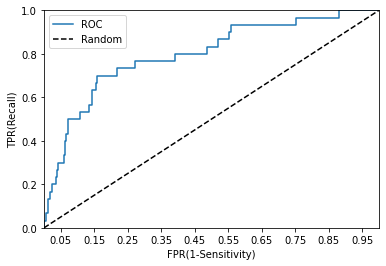

lda의 ROC AUC값: 0.7983


In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


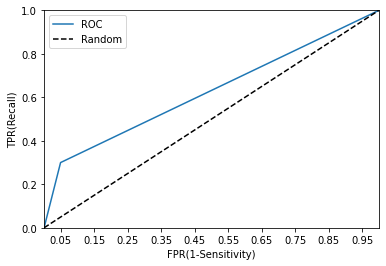

lda의 ROC AUC값: 0.6254


In [83]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

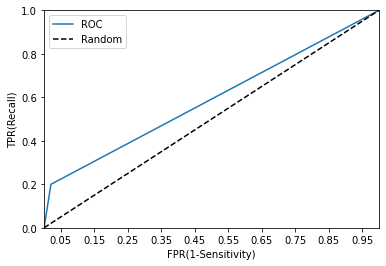

dt ROC AUC값: 0.5898


In [84]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


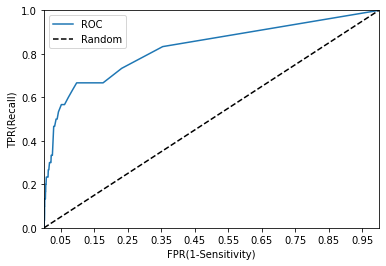

rf ROC AUC값: 0.8264


In [85]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

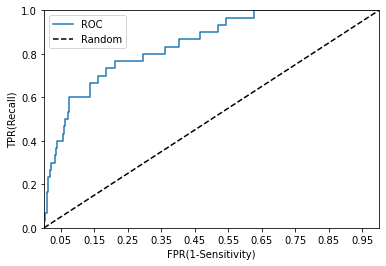

lr ROC AUC값: 0.8451


In [86]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


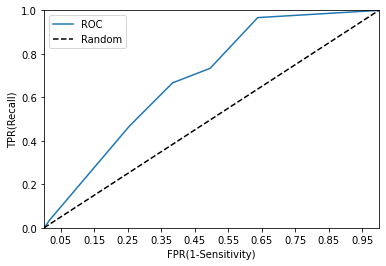

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


knn ROC AUC값: 0.6886


In [87]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))